In [42]:
#Model Regression Example using Bioinformatic Dataset
#Objective: We are going to predict the LogS value which is the aqueous solubility of small molecules.

In [43]:
#We are gonna be using the Delaney Solubility Dataset for this Project

In [44]:
#We import the library for reading the csv
import pandas as pd

In [45]:
#We retrieve and read the dataset from this website:
delaney_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv'
delaney_df = pd.read_csv(delaney_url)
delaney_df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [46]:
#Now we're gonna be calculating the molecular descriptors
#With pd we read the csv with the answers having the molecular descriptors 
delaney_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
delaney_descriptors_df = pd.read_csv(delaney_descriptors_url)
delaney_descriptors_df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [47]:
#Data preparation
#We're gonna be separating the data in X and Y variables
#the input features (the X variables) and the target response variable (the Y variable)

In [48]:
#We take the x variables as input features
X = delaney_descriptors_df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [49]:
#We select a single column (the ‘logS’ column) from the delaney_descriptors_df dataframe via delaney_descriptors_df.logS and assigning this to the Y variable.
Y = delaney_descriptors_df.logS
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [50]:
#We're gonna import this library that helps us to split the data
from sklearn.model_selection import train_test_split

In [51]:
#We start by defining the names of the 4 variables that the train_test_split() function will generate and this includes X_train, X_test, Y_train and Y_test. The first 2 corresponds to the X dataframes for the train and test sets while the last 2 corresponds to the Y variables for the train and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [52]:
#We import now the necessary libraries for making our model regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
#We basically calculate the regression in this step
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [54]:
#Now we use this function to predict our model for x_train
Y_pred_train = model.predict(X_train)

In [55]:
#We now print the values to see the coefficients, errors, etc.
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.76716572 -0.00640931  0.00314562 -0.35765322]
Intercept: 0.23857618492208
Mean squared error (MSE): 0.97
Coefficient of determination (R^2): 0.78


In [56]:
#Now we use this function to predict our model for x_test
Y_pred_test = model.predict(X_test)

In [57]:
#We now print the values to see the coefficients, errors, etc.
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [-0.76716572 -0.00640931  0.00314562 -0.35765322]
Intercept: 0.23857618492208
Mean squared error (MSE): 1.17
Coefficient of determination (R^2): 0.71


In [58]:
#All the components of the regression model equation is derived from the model variable. The y-intercept and the regression coefficients for LogP, MW, RB and AP are provided in model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2] and model.coef_[3].
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
AP = '%.2f AP' % model.coef_[3]

In [59]:
#Here we put together the components and print out the equation via the print() function.
print('LogS = ' + 
      ' ' + 
      yintercept + 
      ' ' + 
      LogP + 
      ' ' + 
      MW + 
      ' + ' + 
      RB + 
      ' ' + 
      AP)

LogS =  0.24 -0.77 LogP -0.0064 MW + 0.0031 RB -0.36 AP


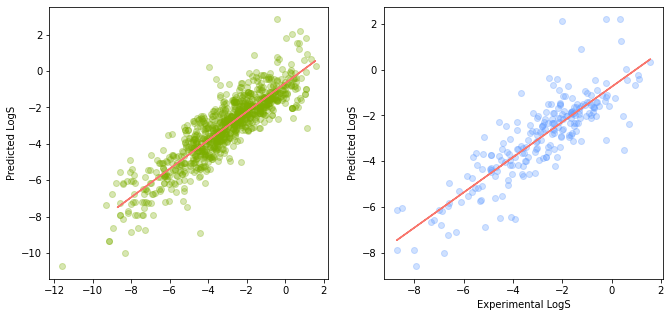

In [64]:
#We know use this libraries for plotting our graph, we basically finish the calculations by now.
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")
plt.ylabel('Predicted LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()

In [ ]:
#We now basically made a model regression for this bioinformatic dataset, it is always important
#to have as much data as we can, because in that way the results would be so much better